In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from math import sqrt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0041297.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0033680.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0057147.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0057707.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0068383.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0033902.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0049289.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0057086.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0034075.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0028414.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0026398.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0059474.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0044867.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0056695.png
/kaggle/input/galaxyimages/GalaxyImages/Ellipticals/PGC0027423

In [38]:
import os

# Check the exact path Kaggle is using (often includes the dataset name)
dataset_main_path = '/kaggle/input/galaxyimages'  # Replace with your actual dataset name
print("Main directory contents:", os.listdir(dataset_main_path))

# Now check for class subfolders
for root, dirs, files in os.walk(dataset_main_path):
    print(f"\nFound {len(dirs)} subdirectories in {root}:")
    for dir_name in dirs:
        class_path = os.path.join(root, dir_name)
        num_images = len(os.listdir(class_path))
        print(f"→ Class '{dir_name}': {num_images} images")
        if num_images == 0:
            print("   WARNING: Empty folder!")

Main directory contents: ['GalaxyImages']

Found 1 subdirectories in /kaggle/input/galaxyimages:
→ Class 'GalaxyImages': 4 images

Found 4 subdirectories in /kaggle/input/galaxyimages/GalaxyImages:
→ Class 'Ellipticals': 289 images
→ Class 'Spirals': 3315 images
→ Class 'Irregulars': 317 images
→ Class 'Lenticulars': 537 images

Found 0 subdirectories in /kaggle/input/galaxyimages/GalaxyImages/Ellipticals:

Found 0 subdirectories in /kaggle/input/galaxyimages/GalaxyImages/Spirals:

Found 0 subdirectories in /kaggle/input/galaxyimages/GalaxyImages/Irregulars:

Found 0 subdirectories in /kaggle/input/galaxyimages/GalaxyImages/Lenticulars:


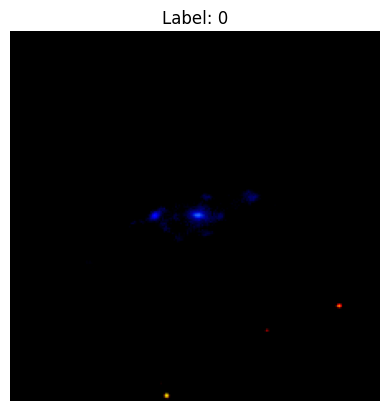

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from the train loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show first image and label
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.title(f"Label: {labels[0]}")
plt.axis('off')
plt.show()

In [46]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import torch

# 🛠️ Fixed Transform Pipeline (minimum changes)
transform = transforms.Compose([
    transforms.Resize(224),  # Direct resize to ViT's expected input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

# 📂 Dataset Loading (unchanged)
data_path = "/kaggle/input/galaxyimages/GalaxyImages"
train_data = ImageFolder(root=data_path, transform=transform)

# ✂️ Train/Val Split (unchanged)
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_ds, val_ds = random_split(train_data, [train_size, val_size])

# 🚀 Optimized DataLoaders (critical fixes)
train_loader = DataLoader(
    train_ds,
    batch_size=64,
    shuffle=True,
    num_workers=2,  # Parallel loading
    pin_memory=True if torch.cuda.is_available() else False  # Faster GPU transfer
)

val_loader = DataLoader(
    val_ds,
    batch_size=64,
    shuffle=False,  # No shuffle for validation!
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

# ✅ Quick Verification
print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")
images, labels = next(iter(train_loader))
print(f"Image shape: {images.shape}")  # Should be [64, 3, 224, 224]
print(f"Label shape: {labels.shape}")  # Should be [64]

Train batches: 56, Val batches: 14
Image shape: torch.Size([64, 3, 224, 224])
Label shape: torch.Size([64])


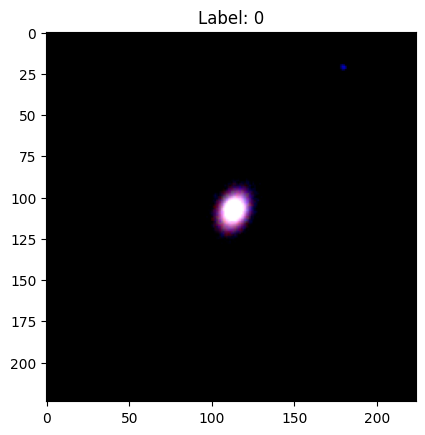

Class counts: Counter({3: 3315, 2: 537, 1: 317, 0: 289})


In [47]:
import matplotlib.pyplot as plt

# Show first image
plt.imshow(images[0].permute(1, 2, 0).numpy())
plt.title(f"Label: {labels[0].item()}")
plt.show()

from collections import Counter
print("Class counts:", Counter(train_data.targets))

In [48]:
import os
data_path = "/kaggle/input/galaxyimages/GalaxyImages"
print("Subdirectories:", os.listdir(data_path))  # Should show multiple class folders

Subdirectories: ['Ellipticals', 'Spirals', 'Irregulars', 'Lenticulars']


In [49]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=3, patch_size=4, emb_size=256, img_size=32):
        super().__init__()
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2
        self.proj = nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # (B, emb_size, H/patch, W/patch)
        x = x.flatten(2)  # (B, emb_size, N)
        x = x.transpose(1, 2)  # (B, N, emb_size)
        return x


In [51]:
class TransformerEncoder(nn.Module):
    def __init__(self, emb_size=256, num_heads=8, ff_hidden=512, dropout=0.1):
        super().__init__()
        self.ln1 = nn.LayerNorm(emb_size)
        self.mha = nn.MultiheadAttention(embed_dim=emb_size, num_heads=num_heads, batch_first=True)
        self.ln2 = nn.LayerNorm(emb_size)
        self.ff = nn.Sequential(
            nn.Linear(emb_size, ff_hidden),
            nn.GELU(),
            nn.Linear(ff_hidden, emb_size)
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x + self.dropout(self.mha(self.ln1(x), self.ln1(x), self.ln1(x))[0])
        x = x + self.dropout(self.ff(self.ln2(x)))
        return x

In [52]:
class VisionTransformer(nn.Module):
    def __init__(self, img_size=32, patch_size=4, emb_size=256, depth=6, num_heads=8, num_classes=10):
        super().__init__()
        self.patch_embed = PatchEmbedding(3, patch_size, emb_size, img_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, emb_size))
        self.pos_embed = nn.Parameter(torch.randn(1, (img_size // patch_size) ** 2 + 1, emb_size))
        self.transformer = nn.Sequential(*[
            TransformerEncoder(emb_size, num_heads) for _ in range(depth)
        ])
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(emb_size),
            nn.Dropout(0.1),
            nn.Linear(emb_size, num_classes)
        )

    def forward(self, x):
        B = x.size(0)
        x = self.patch_embed(x)  # (B, N, emb_size)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embed
        x = self.transformer(x)
        return self.mlp_head(x[:, 0])


In [57]:
print("outputs shape:", outputs.shape)  # Should be (batch_size, num_classes)
print("labels shape:", labels.shape)    # Should be (batch_size,)
print("outputs.argmax(1):", outputs.argmax(1))
print("labels:", labels)

outputs shape: torch.Size([64, 1000])
labels shape: torch.Size([64])
outputs.argmax(1): tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')
labels: tensor([3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3,
        3, 3, 3, 3, 1, 2, 1, 3, 0, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 0, 0, 3, 2, 2, 2, 3, 3, 3, 1, 3, 3], device='cuda:0')


In [58]:
from timm.models.vision_transformer import VisionTransformer
from torch.optim.lr_scheduler import LambdaLR
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VisionTransformer(
    img_size=224,
    patch_size=16,
    num_classes=4,  # <--- ADD THIS
    drop_rate=0.1,  # Attention dropout
    drop_path_rate=0.1  # Stochastic depth
).to(device)

optimizer = optim.AdamW(  # Changed to AdamW (better for ViTs)
    model.parameters(), 
    lr=3e-5,  # Reduced from 3e-4 (ViTs need lower LR)
    weight_decay=0.01
)

warmup_epochs = 5
scheduler = LambdaLR(
    optimizer,
    lr_lambda=lambda epoch: min(epoch / warmup_epochs, 1.0)
)

criterion = nn.CrossEntropyLoss()

for epoch in range(5):
    # Training Phase
    model.train()
    train_loss = 0
    train_correct = 0
    
    num_train_samples = 0

    for batch in tqdm(train_loader):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        train_loss += loss.item()
        train_correct += (outputs.argmax(1) == labels).sum().item()
        num_train_samples += labels.size(0)
    
        train_acc = train_correct / num_train_samples
    
    # Update learning rate
    scheduler.step() 
    
    # Validation Phase
    model.eval()
    val_loss = 0
    val_correct = 0
    with torch.no_grad():
        for batch in val_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            val_correct += (outputs.argmax(1) == labels).sum().item()
    
    # Calculate metrics
    train_acc = train_correct / len(train_loader.dataset)
    val_acc = val_correct / len(val_loader.dataset)
    
    print(f"Epoch {epoch+1}:")
    print(f"  Train Loss: {train_loss/len(train_loader):.4f}, Acc: {train_acc*100:.2f}%")
    print(f"  Val Loss: {val_loss/len(val_loader):.4f}, Acc: {val_acc*100:.2f}%")

100%|██████████| 56/56 [02:10<00:00,  2.33s/it]


Epoch 1:
  Train Loss: 1.2496, Acc: 52.61%
  Val Loss: 1.2351, Acc: 72.76%


100%|██████████| 56/56 [02:08<00:00,  2.30s/it]


Epoch 2:
  Train Loss: 1.0250, Acc: 74.43%
  Val Loss: 0.8389, Acc: 72.76%


100%|██████████| 56/56 [02:08<00:00,  2.29s/it]


Epoch 3:
  Train Loss: 0.7400, Acc: 74.79%
  Val Loss: 0.6639, Acc: 73.54%


100%|██████████| 56/56 [02:08<00:00,  2.30s/it]


Epoch 4:
  Train Loss: 0.6272, Acc: 75.80%
  Val Loss: 0.6040, Acc: 73.88%


100%|██████████| 56/56 [02:08<00:00,  2.29s/it]


Epoch 5:
  Train Loss: 0.5829, Acc: 76.36%
  Val Loss: 0.5117, Acc: 78.59%


In [59]:
model.eval()
correct = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(1)
        correct += (preds == labels).sum().item()

acc = correct / len(val_loader.dataset)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 78.59%


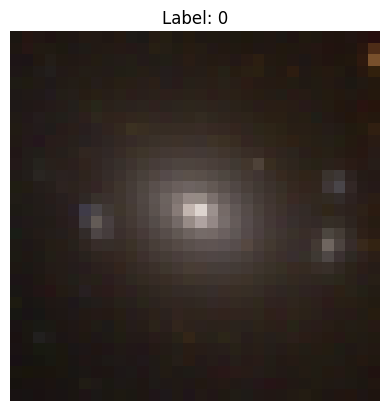

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from the train loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show first image and label
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.title(f"Label: {labels[0]}")
plt.axis('off')
plt.show()